In [489]:
# import common libraries
import pandas as pd
import scipy.stats as st
import pylab as plt
import numpy as np

import matplotlib.pyplot as pl
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

import time

 ## Read Train and Test Dataset

In [490]:
data_frame_train = pd.read_table('shuttle.trn', sep = ',')
data_frame_train

,Id,0,1,2,3,4,5,6,7,8,Category
0,0,50,21,77,0,28,0,27,48,22,2
1,1,55,0,92,0,0,26,36,92,56,4
2,2,53,0,82,0,52,-5,29,30,2,1
3,3,37,0,76,0,28,18,40,48,8,1
4,4,37,0,79,0,34,-26,43,46,2,1
...,...,...,...,...,...,...,...,...,...,...,...
43495,43495,46,5,78,0,46,5,32,32,0,1
43496,43496,37,0,79,-1,10,3,43,69,26,1
43497,43497,48,0,78,3,46,0,30,32,2,1
43498,43498,41,0,79,0,38,-25,38,40,2,1


In [125]:
#rename columns' names
data_frame_train.columns=['ID','0', '1', '2' , '3', '4', '5', '6' , '7', '8'  , 'Class']

In [149]:
data_frame_train.info()# information aboout data, notice there is no Non-values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43500 entries, 0 to 43499
Data columns (total 10 columns):
0        43500 non-null int64
1        43500 non-null int64
2        43500 non-null int64
3        43500 non-null int64
4        43500 non-null int64
5        43500 non-null int64
6        43500 non-null int64
7        43500 non-null int64
8        43500 non-null int64
Class    43500 non-null int64
dtypes: int64(10)
memory usage: 3.3 MB


In [134]:
# Drop the ID column , double index
data_frame_train=data_frame_train.drop(data_frame_train.columns[0], axis=1)

In [135]:
# read the top 5 rows (head) of the data
print(data_frame_train.head())

    0   1   2  3   4   5   6   7   8  Class
0  50  21  77  0  28   0  27  48  22      2
1  55   0  92  0   0  26  36  92  56      4
2  53   0  82  0  52  -5  29  30   2      1
3  37   0  76  0  28  18  40  48   8      1
4  37   0  79  0  34 -26  43  46   2      1


In [136]:
# dataset information , columns, constraints and their datatype
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43500 entries, 0 to 43499
Data columns (total 10 columns):
0        43500 non-null int64
1        43500 non-null int64
2        43500 non-null int64
3        43500 non-null int64
4        43500 non-null int64
5        43500 non-null int64
6        43500 non-null int64
7        43500 non-null int64
8        43500 non-null int64
Class    43500 non-null int64
dtypes: int64(10)
memory usage: 3.3 MB


In [131]:
# read test dataset

data_frame_test = pd.read_table('shuttle.tst', sep = ',')
data_frame_test

,Id,0,1,2,3,4,5,6,7,8
0,0,55,0,81,0,-6,11,25,88,64
1,1,56,0,96,0,52,-4,40,44,4
2,2,50,-1,89,-7,50,0,39,40,2
3,3,53,9,79,0,42,-2,25,37,12
4,4,55,2,82,0,54,-6,26,28,2
...,...,...,...,...,...,...,...,...,...,...
14495,14495,80,0,84,0,-36,-29,4,120,116
14496,14496,55,0,81,0,-20,25,26,102,76
14497,14497,55,0,77,0,12,-22,22,65,42
14498,14498,37,0,103,0,18,-16,66,85,20


In [132]:
# Drop the ID column , double index
data_frame_test=data_frame_test.drop(data_frame_test.columns[0], axis=1)

In [150]:
# basic information about test data
data_frame_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14500 entries, 0 to 14499
Data columns (total 9 columns):
0    14500 non-null int64
1    14500 non-null int64
2    14500 non-null int64
3    14500 non-null int64
4    14500 non-null int64
5    14500 non-null int64
6    14500 non-null int64
7    14500 non-null int64
8    14500 non-null int64
dtypes: int64(9)
memory usage: 1019.7 KB


## Visulizing data using Seaborn Library 

In [137]:
data_frame_train

,0,1,2,3,4,5,6,7,8,Class
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1
...,...,...,...,...,...,...,...,...,...,...
43495,46,5,78,0,46,5,32,32,0,1
43496,37,0,79,-1,10,3,43,69,26,1
43497,48,0,78,3,46,0,30,32,2,1
43498,41,0,79,0,38,-25,38,40,2,1


In [138]:
# import seaborn librar, different classes will be colorfull
sns.set(style="ticks", color_codes=True)


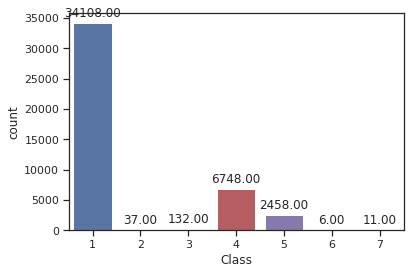

In [143]:
# countplot shows the count of data in each class
# we can see that majority of the data is classified in class 1(imbalance issue!)
# this leads to imbalance of our data
cplot=sns.countplot(x='Class',data=data_frame_train)

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.2f'),
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    # 

/home/aims/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/aims/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


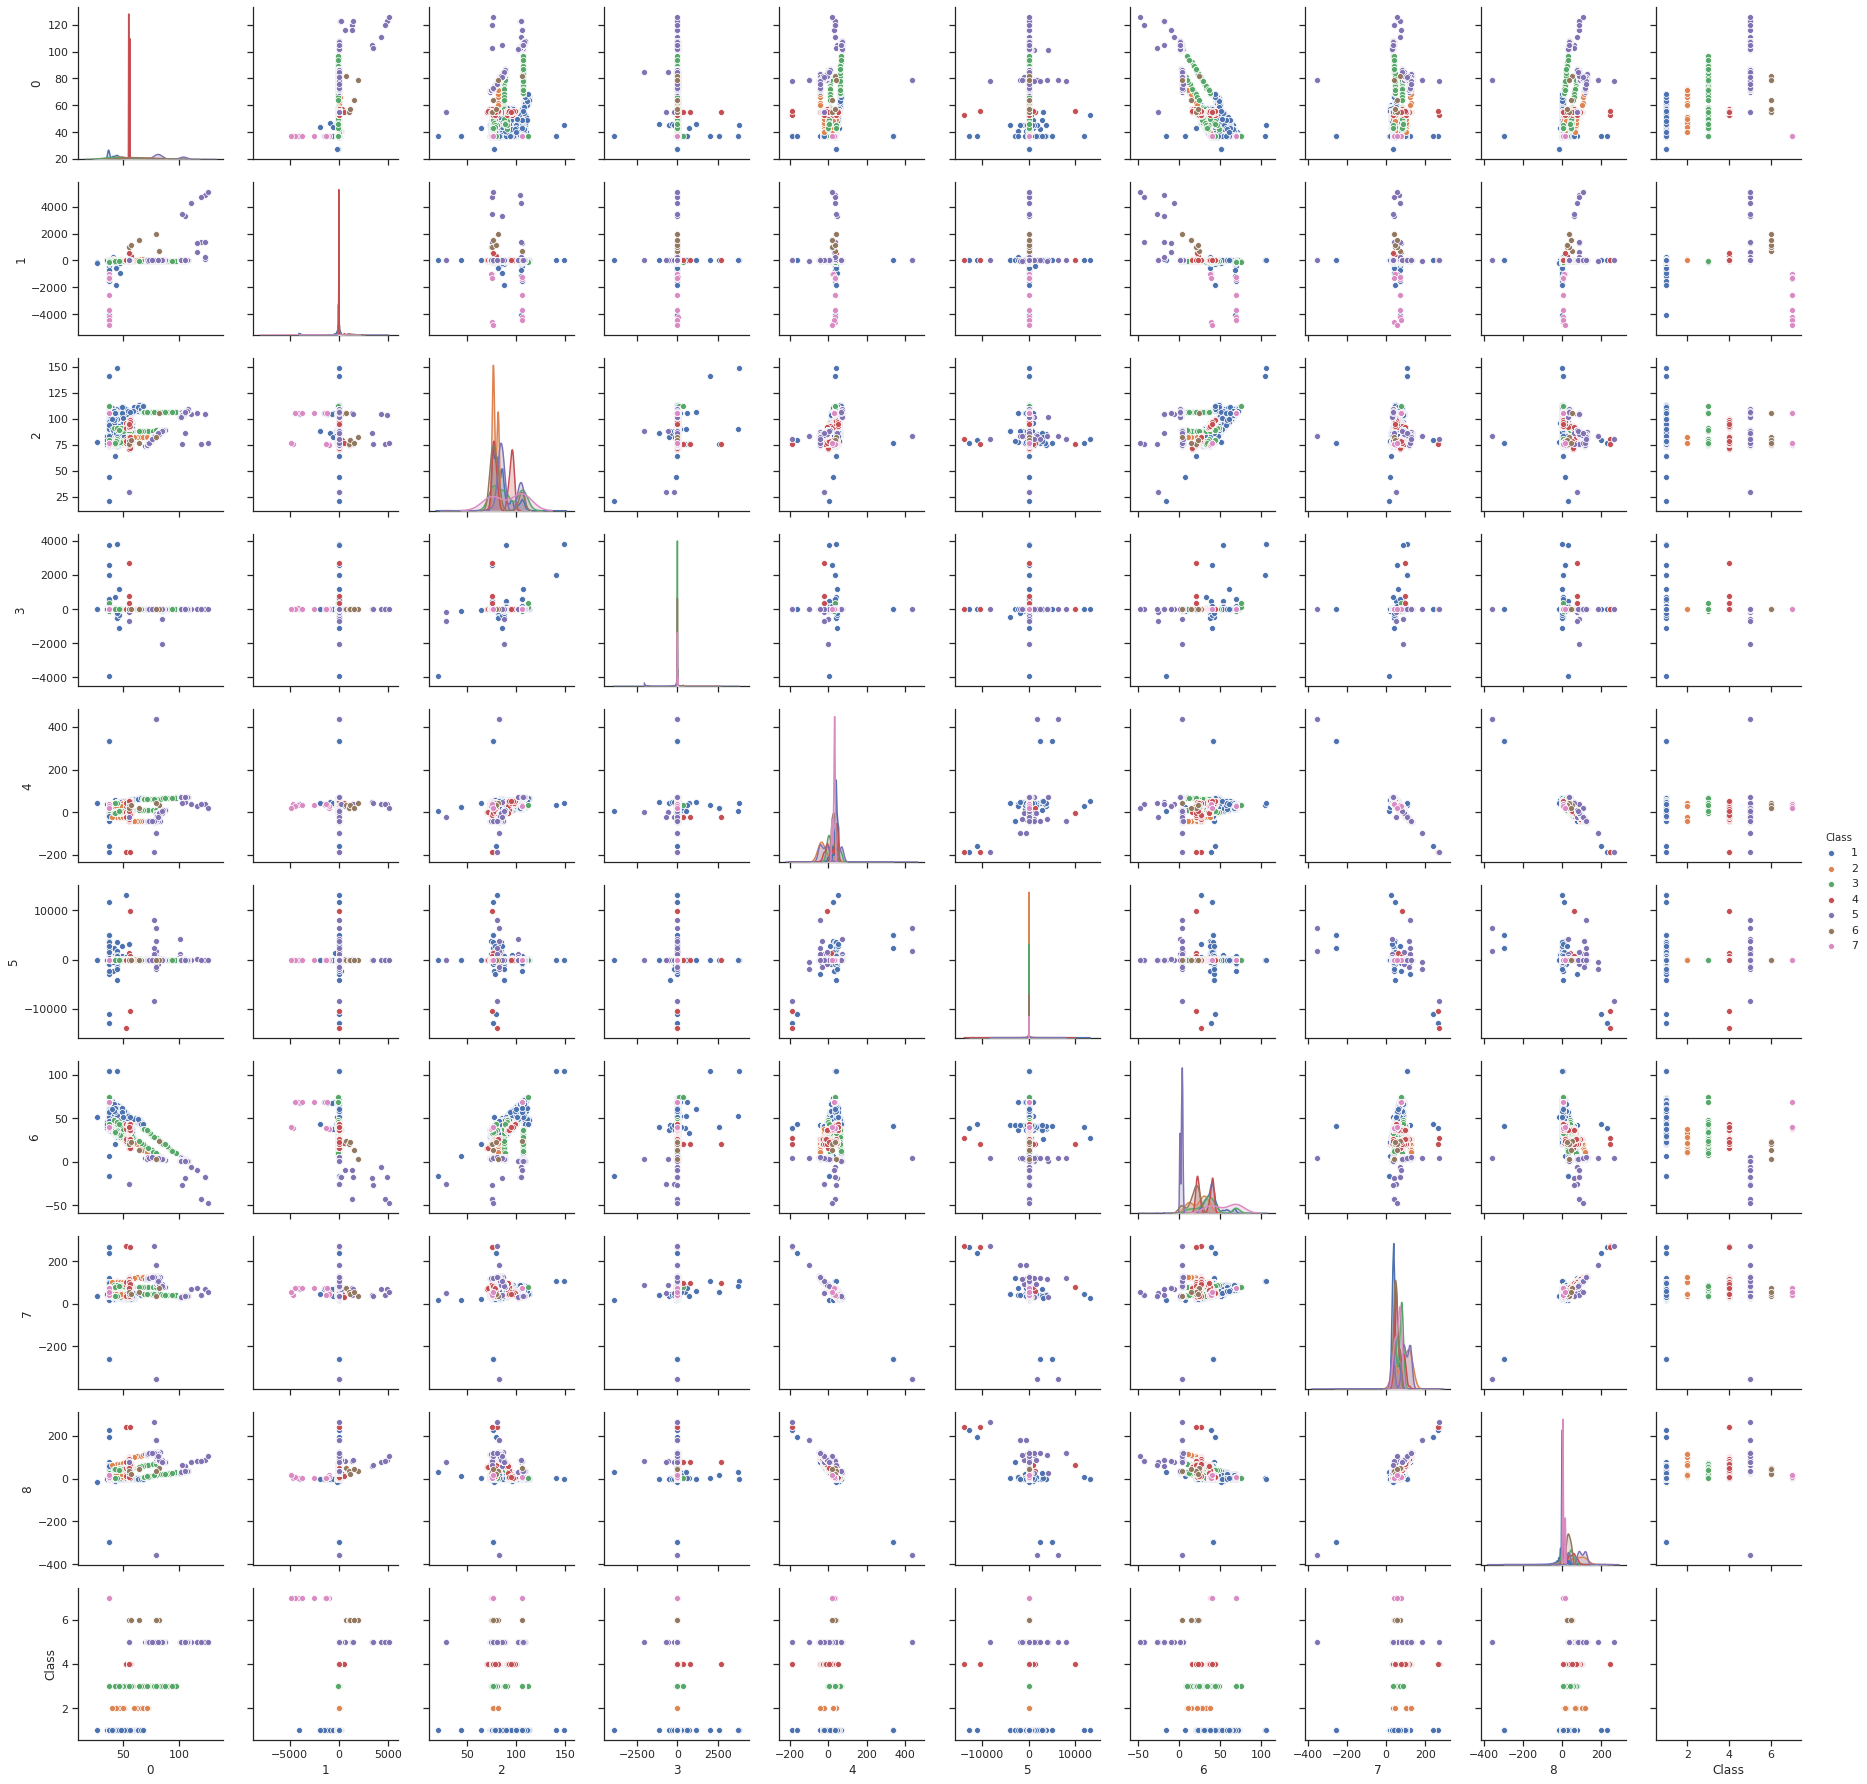

In [144]:

#pair plot summarize the relationships between dataset attributes 

sns.pairplot(data_frame_train, hue='Class', diag_kind = 'kde')

# this graph shows that, the data is not linear separable 

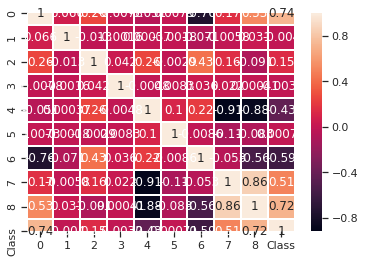

In [14]:
#heat map, shows the correlation between attributes
# we can see that there are strong correlation between (0,6) and (4,6,7) attributes
sns.heatmap(data_frame_train.corr(), annot=True , linewidths=1)


In [147]:
# ###### # plot histogram
# f, axes = plt.subplots(2,4, figsize=(15,15), sharex=True)
# sns.distplot( data_frame_train["1"] , color="skyblue", ax=axes[0, 0])
# # sns.distplot( data_frame_train["2"] , color="olive", ax=axes[0, 1])
# # sns.distplot( data_frame_train["3"] , color="gold", ax=axes[0, 2])
# # sns.distplot( data_frame_train["4"] , color="teal", ax=axes[0, 3])
# # sns.distplot( data_frame_train["5"] , color="skyblue", ax=axes[1, 0])
# # sns.distplot( data_frame_train["6"] , color="olive", ax=axes[1, 1])
# # sns.distplot( data_frame_train["7"] , color="gold", ax=axes[1, 2])
# # sns.distplot( data_frame_train["8"] , color="teal", ax=axes[1, 3])

## Basic statistics to summarize the data

In [148]:
# basic statistics about dataset, describe() function lists the main statistical functions
data_frame_train.describe(include='all')# All means, include all columns

,0,1,2,3,4,5,6,7,8,Class
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,48.249747,-0.205126,85.341563,0.262736,34.528782,1.298276,37.074552,50.899862,13.964598,1.700529
std,12.252618,78.142770,8.908602,41.004131,21.703409,179.486760,13.135557,21.463250,25.648404,1.354648
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-13839.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,13148.000000,105.000000,270.000000,266.000000,7.000000


In [22]:
# to count the number of non-null observations we can use count() function.

type_counts1 = data_frame_train['1'].count()
type_counts2 = data_frame_train['2'].count()
type_counts3 = data_frame_train['3'].count()

type_counts4 = data_frame_train['4'].count()
type_counts5 = data_frame_train['5'].count()
type_counts6 = data_frame_train['6'].count()

type_counts7 = data_frame_train['7'].count()
type_counts8 = data_frame_train['8'].count()


In [23]:
type_counts1, type_counts2, type_counts3, type_counts4, type_counts5, type_counts6, type_counts7, type_counts8

(43500, 43500, 43500, 43500, 43500, 43500, 43500, 43500)

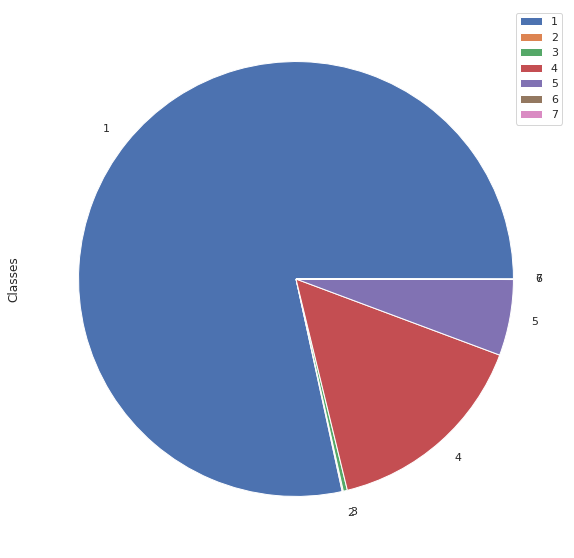

In [28]:
# Pie Graph gives more illustration about the size of the classes., another way to see unbalance of classes.
ppie = pd.DataFrame({'Classes': [34108.0, 37 , 132, 6748, 2458, 6,11]},
...                   index=['1', '2', '3', '4', '5', '6', '7'])
plot = ppie.plot.pie(y='Classes', figsize=(10, 10))

Column NO: 1
Kurtosis: 2824.2911627783424


/home/aims/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


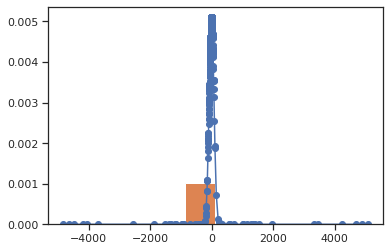

Column NO: 2
Kurtosis: 0.5799119596365307


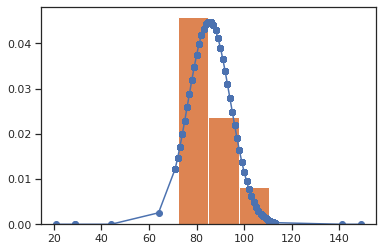

Column NO: 3
Kurtosis: 6379.551036912535


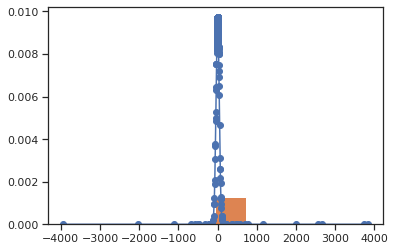

Column NO: 4
Kurtosis: 10.0503206333704


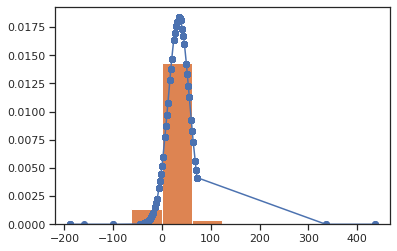

Column NO: 5
Kurtosis: 3588.2429145501746


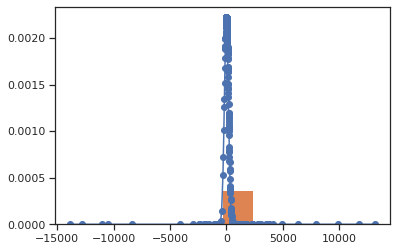

Column NO: 6
Kurtosis: 1.6379522189455153


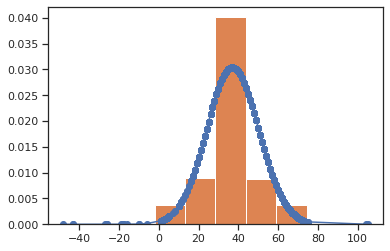

Column NO: 7
Kurtosis: 10.224504565223434


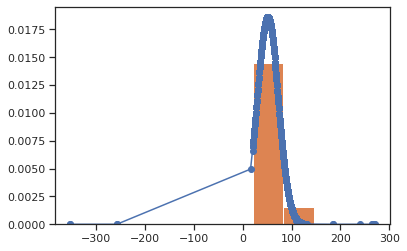

Column NO: 8
Kurtosis: 9.008339735303432


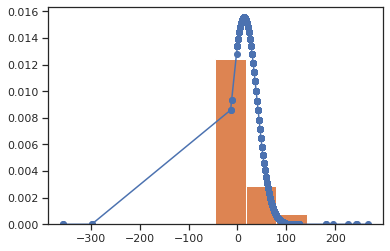

In [153]:

##  to know more information about data distribution let us plot the kurtosis
# Kurtosis shows the distribution of the data by columns, some columns need to be normlized (the distribution is not in the bell curve)

def plot_(data, avg, var):
    sigma = np.sqrt(var)
    pl.plot(data,st.norm.pdf(data, avg, sigma), "-o")
    pl.hist(data, normed=True)
    print("Kurtosis: " + str(st.kurtosis(data)))
    pl.show()

for col in range(1,len(data_frame_train.iloc[0])-1):
    print("Column NO: " + str(col))
    values = data_frame_train.iloc[:, col].values
    plot_(sorted(values), values.mean(), values.var())

## Data Cleaning

In [154]:
#we can use dataset df.isna()and sum() to check the number of null values in our dataset.

data_frame_train.isna().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
Class    0
dtype: int64

In [156]:
#in the case we want to delete the Missing Values the function dropna() is used to drop these values.
# however, here we dont have dropped data.

processed_data = data_frame_train.dropna()
processed_data



,0,1,2,3,4,5,6,7,8,Class
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1
...,...,...,...,...,...,...,...,...,...,...
43495,46,5,78,0,46,5,32,32,0,1
43496,37,0,79,-1,10,3,43,69,26,1
43497,48,0,78,3,46,0,30,32,2,1
43498,41,0,79,0,38,-25,38,40,2,1


## Logistic Regression using Scikit Library

In [11]:
# do k fold validation
# tune parameters

In [177]:
# import the LR model
from sklearn.linear_model import LogisticRegression

In [193]:
#Data standrization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data=data_frame_train.drop(columns='Class', axis=1)
scaled_data=scaler.fit_transform(data)

In [186]:
target=data_frame_train['Class']

In [194]:
scaled_data

array([[ 0.1428489 ,  0.27136702, -0.9363601 , ..., -0.76697683,
        -0.1351098 ,  0.31329414],
       [ 0.55092966,  0.00262505,  0.7474252 , ..., -0.08180575,
         1.91492951,  1.63892792],
       [ 0.38769735,  0.00262505, -0.37509834, ..., -0.61471659,
        -0.97376225, -0.46649044],
       ...,
       [-0.0203834 ,  0.00262505, -0.82410775, ..., -0.53858647,
        -0.88057864, -0.46649044],
       [-0.59169645,  0.00262505, -0.7118554 , ...,  0.07045449,
        -0.50784422, -0.46649044],
       [-0.67331261, -0.03576666,  1.64544403, ...,  1.82144725,
         0.51717543, -0.46649044]])

In [195]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.25, random_state=0)

In [231]:
# create an instance
LR = LogisticRegression()
# fit the train data into the model
LR.fit(x_train, y_train)

/home/aims/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
predictions = LR.predict(x_test)

accuracy=np.mean(predictions==y_test)

In [203]:
accuracy # without standerdization the accuracc is about .922 

0.9664367816091954

### Tuning LR parameters

In [239]:
#let's have a look at  LR model's parameters
#LogisticRegression?

# the most interested parameter can be class_weight as long as our data is not balanced 
# this method can be used as resampling techniques

#### weighted Logistic Regession

In [481]:
weights= {1:3, 2:99, 3:97 , 4: 82, 5:94 , 6:99 , 7: 99 }  #1:970, 2: 1 , 3: 3 , 4: 18, 5: 6 , 6:1  , 7: 1

In [483]:
# now lets compute the logistic model after weighted the classes:
train_start_time = time.time()

LR = LogisticRegression(random_state=13, class_weight=weights)
LR.fit(x_train, y_train)

train_end_time=(time.time() - train_start_time)
print(" %s train time in seconds  " % train_end_time)

 0.7149477005004883 train time in seconds  


/home/aims/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [484]:
predictions = LR.predict(x_test)

accuracy=np.mean(predictions==y_test)

In [311]:
# now lets using using K fold cross validation, this can also work as prameters tuning because we want to find the 

#define the number of folds, k=10
kfold = model_selection.KFold(n_splits=15, random_state=100)

# we use Logistic regressio model 
model_kfold = LogisticRegression()

# we process the k fold cross validation and we 
model_with_kfold = model_selection.cross_val_score(model_kfold, scaled_data, target, cv=kfold, scoring='accuracy')
print("Accuracy: %.4f%%" % (model_with_kfold.mean()*100.0)) 

/home/aims/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/aims/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aims/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS 

Accuracy: 94.9931%


/home/aims/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [242]:
print("Accuracy: %.3f%%" % (model_with_kfold.mean()*100.0)) 

Accuracy: 96.653%


### Visualization of predicted data and target

Text(66.5, 0.5, 'target')

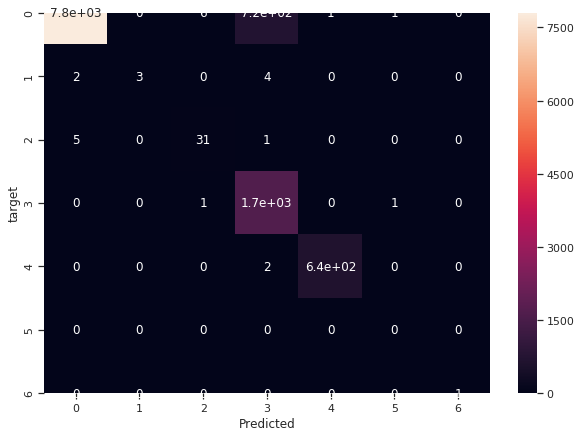

In [243]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize = (10,7))
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('target')


In [244]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2034942528735632
MSE: 0.6077241379310345
RMSE: 0.779566634695864


In [ ]:
KNN is not influenced b the size of classes

In [356]:
# confustion metrix and classification report

print (confusion_matrix(y_test, predictions) )
print (classification_report(y_test, predictions) )

[[7801    0    6  722    1    1    0]
 [   2    3    0    4    0    0    0]
 [   5    0   31    1    0    0    0]
 [   0    0    1 1653    0    1    0]
 [   0    0    0    2  640    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    1]]
              precision    recall  f1-score   support

           1       1.00      0.91      0.95      8531
           2       1.00      0.33      0.50         9
           3       0.82      0.84      0.83        37
           4       0.69      1.00      0.82      1655
           5       1.00      1.00      1.00       642
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         1

    accuracy                           0.93     10875
   macro avg       0.79      0.73      0.73     10875
weighted avg       0.95      0.93      0.94     10875



/home/aims/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Test the Data

In [460]:
scaler = StandardScaler() 

test_scaled_data=scaler.fit_transform(data_frame_test)

In [461]:

test_start_time = time.time()
pred_test_data=LR.predict(test_scaled_data)
test_end_time=(time.time() - test_start_time)
print(" %s test time in seconds  " % test_end_time)

 0.003182649612426758 test time in seconds  


In [462]:
# example of data prediction
pred_test_data[22]

1

 ## KNN using Sciket Library

In [293]:
# import KNN model
from sklearn.neighbors import KNeighborsClassifier


In [294]:
# Data normlization using MinMaxScaler
scaler = MinMaxScaler() 
knn_data=data_frame_train.drop(columns='Class', axis=1)
knn_scaled_data = scaler.fit_transform(knn_data)

In [295]:
knn_target=data_frame_train['Class']

In [296]:
x_train, x_test, y_train, y_test = train_test_split(knn_scaled_data, knn_target, test_size=0.25, random_state=0)

### Fine Tuning KNN parameters

In [ ]:
# find the best number of k we can get in range (1:30)
# and test which is better to use p = 1 or 2, p=1 is equivalent to using manhattan_distance (l1),
#and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. [3]

## the predcition with p=1 is better

In [338]:
Scores=[]
for pp in range (1,3): # p = 1 or 2?
    for k in range(1,31):
        #  run the model with k neighbours
        KNNmodel = KNeighborsClassifier(n_neighbors=k , p=pp)
        KNNmodel.fit(x_train,y_train)
        predicted= KNNmodel.predict(x_test)
        accuracy=np.mean(predicted==y_test)
   
        Scores.append(accuracy)
        print ('score= ', accuracy, 'k =' ,k , 'p = ' , pp)

    print('max accuaracy is ' ,np.max(Scores))

# make note that the best score is given when K value is 1, that shows how unbalance the data is

score=  0.999448275862069 k = 1 p =  1
score=  0.9988045977011494 k = 2 p =  1
score=  0.9989885057471264 k = 3 p =  1
score=  0.9988045977011494 k = 4 p =  1
score=  0.9987126436781609 k = 5 p =  1
score=  0.9982528735632183 k = 6 p =  1
score=  0.9979770114942529 k = 7 p =  1
score=  0.9978850574712643 k = 8 p =  1
score=  0.9973333333333333 k = 9 p =  1
score=  0.9972413793103448 k = 10 p =  1
score=  0.9971494252873563 k = 11 p =  1
score=  0.9971494252873563 k = 12 p =  1
score=  0.9969655172413793 k = 13 p =  1
score=  0.9968735632183908 k = 14 p =  1
score=  0.9967816091954023 k = 15 p =  1
score=  0.9966896551724138 k = 16 p =  1
score=  0.9965977011494253 k = 17 p =  1
score=  0.9965057471264368 k = 18 p =  1
score=  0.9965057471264368 k = 19 p =  1
score=  0.9964137931034482 k = 20 p =  1
score=  0.9964137931034482 k = 21 p =  1
score=  0.9963218390804598 k = 22 p =  1
score=  0.9961379310344828 k = 23 p =  1
score=  0.9961379310344828 k = 24 p =  1
score=  0.9961379310344828

In [367]:
# create an instance, k= 3 p=1,i do not choose k=1 ,  
#because this can make the model sensitive to the noize, the best second accuracy is when k=3 

train_start_time = time.time()# set the start time
KNNmodel = KNeighborsClassifier(n_neighbors=3, p=1)
# fit the train data into the model
KNNmodel.fit(x_train,y_train)
train_end_time=(time.time() - train_start_time)
print(" %s train time in seconds  " % train_end_time)

 0.12401962280273438 train time in seconds  


In [368]:
predicted= KNNmodel.predict(x_test)

accuracy=np.mean(predicted==y_test)

accuracy

0.9989885057471264

In [408]:
# K-fold validation with K=7 for KNN and k-fold = 15
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are using the whole data not just X_train or y_train
scores = model_selection.cross_val_score(knn, knn_scaled_data, knn_target, cv=15, scoring='accuracy')

print("Accuracy: %.4f%%" % (scores.mean()*100.0)) 

/home/aims/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 99.8644%


In [357]:
# confustion metrix and classification report

print (confusion_matrix(y_test, predicted) )
print (classification_report(y_test, predicted) )

[[8524    0    0    7    0    0]
 [   8    0    0    1    0    0]
 [  19    0    7    6    5    0]
 [   1    0    0 1654    0    0]
 [   0    0    0    0  642    0]
 [   0    0    1    0    0    0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8531
           2       0.00      0.00      0.00         9
           3       0.88      0.19      0.31        37
           4       0.99      1.00      1.00      1655
           5       0.99      1.00      1.00       642
           7       0.00      0.00      0.00         1

    accuracy                           1.00     10875
   macro avg       0.64      0.53      0.55     10875
weighted avg       0.99      1.00      0.99     10875



Text(66.5, 0.5, 'target')

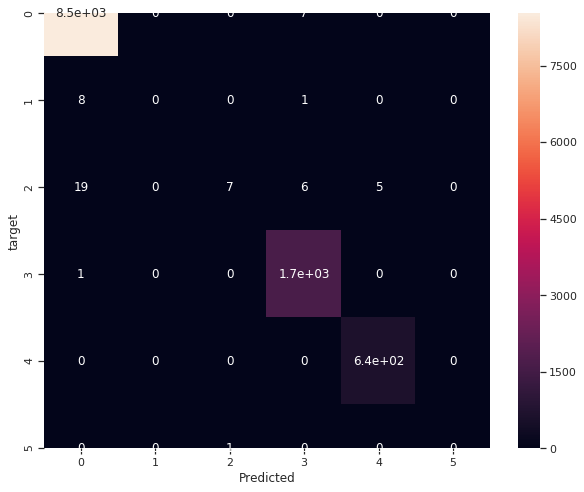

In [358]:

conf_mat2 = confusion_matrix(y_test, predicted)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('target')


In [359]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 0.00845977011494253
MSE: 0.01857471264367816
RMSE: 0.13628907749221197


## Test the Data

In [456]:
#test data normlization using MinMaxScaler
scaler = MinMaxScaler() 

knn_scaled_data = scaler.fit_transform(data_frame_test)

In [457]:
test_start = time.time()
pred_test=LR.predict(knn_scaled_data)
test_end=(time.time() - test_start)
print(" %s test time in seconds  " % test_end)

 0.002465486526489258 test time in seconds  


In [458]:
# example of data prediction
pred_test_data[22]

3

## SVM  using Sciket Library

In [411]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [412]:
# Data normlization using MinMaxScaler
scaler = MinMaxScaler() 
svm_data=data_frame_train.drop(columns='Class', axis=1)
svm_scaled_data = scaler.fit_transform(svm_data)

In [413]:

svm_target=data_frame_train['Class']

In [414]:

X_train, X_test, y_train, y_test = train_test_split(svm_scaled_data, svm_target, test_size = 0.25)


### Fine Tuning SVM parameters

In [ ]:
# SVM has many parameters to consider, we will focus here on Cost(c) and gamma, prameter C is a Penalty parameter,
#describe the sitivity of the algorithm.
#gamma describe the shape of the curve that we need in decision boundary

In [401]:
# in this function we want to fine tune the parameters: C and gamma, we also run k-fold cross validation, when k=15
# we making advantage of using GridSearchCV, so we can get the best value of c and gamma among given values.

def tuning_svc_params(X, y):
    Cost = [0.01, 0.1, 1, 5, 10,40,50]
    Gamma = [0.001, 0.01, 0.1, 1 ,2]
    parameters = {'C': Cost, 'gamma' : Gamma}
    Grid_search = GridSearchCV(svm.SVC(kernel='rbf'), parameters, cv=15)
    Grid_search.fit(X, y)
    Grid_search.best_params_
    return Grid_search.best_params_

In [403]:
tuning_svc_params(x_train,y_train)

In [446]:

# now lets compute the svm model.
#we will assign class_weight='balanced' to balance the weight (automatically) of the different classes, this can also work as a resampling techniq.
# C=50 , gamma = 2 are give better accuracy comparing to other values, when we increase C the accuracy will increase too.
svmtrain_start_time = time.time()# start time

svmclassifier = SVC(C=50, kernel = 'rbf',gamma=2, class_weight='balanced')
svmclassifier.fit(X_train, y_train)

svmtrain_end_time=(time.time() - svmtrain_start_time)# end of excution time
print(" %s train time in seconds  " % svmtrain_end_time)

 7.273636102676392 train time in seconds  


In [488]:

svmtrain_start_time = time.time()# start time

svmclassifier = SVC(C=50, kernel = 'laplace',gamma=2, class_weight='balanced')
svmclassifier.fit(X_train, y_train)

svmtrain_end_time=(time.time() - svmtrain_start_time)# end of excution time
print(" %s train time in seconds  " % svmtrain_end_time)

ValueError: 'laplace' is not in list

In [447]:
svmpredicted= svmclassifier.predict(X_test)

accuracy=np.mean(svmpredicted==y_test)

accuracy

0.991816091954023

In [448]:
# confustion metrix and classification report
print (confusion_matrix(y_test, svmpredicted) )
print (classification_report(y_test, svmpredicted) )

[[8500    0   10   72    0    0]
 [   0   11    0    0    0    0]
 [   1    0   24    0    0    0]
 [   1    4    0 1638    0    0]
 [   0    0    0    0  612    0]
 [   0    1    0    0    0    1]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00      8582
           2       0.69      1.00      0.81        11
           3       0.71      0.96      0.81        25
           4       0.96      1.00      0.98      1643
           5       1.00      1.00      1.00       612
           6       1.00      0.50      0.67         2

    accuracy                           0.99     10875
   macro avg       0.89      0.91      0.88     10875
weighted avg       0.99      0.99      0.99     10875



Text(66.5, 0.5, 'target')

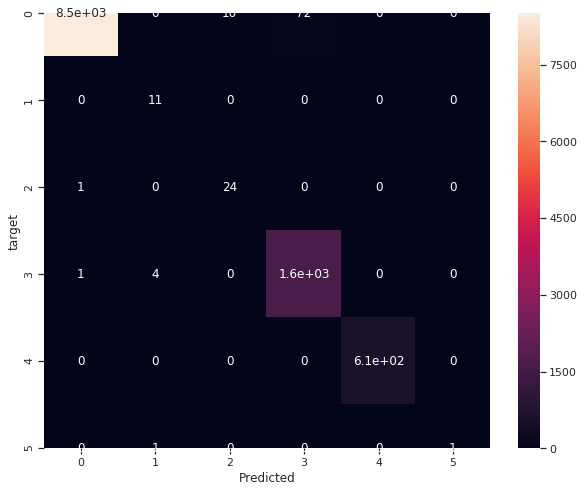

In [449]:

conf_mat2 = confusion_matrix(y_test, svmpredicted)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('target')


In [450]:
# different errors means
print('MAE:', metrics.mean_absolute_error(y_test, svmpredicted))
print('MSE:', metrics.mean_squared_error(y_test, svmpredicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svmpredicted)))

MAE: 0.023264367816091956
MSE: 0.06740229885057471
RMSE: 0.25961952709797215


## Test the Data

In [452]:
# test Data normlization using MinMaxScaler
scaler = MinMaxScaler() 

svm_scaled_data = scaler.fit_transform(data_frame_test)

In [454]:
svm_test_start = time.time()
pred_test=LR.predict(svm_scaled_data)
svm_test_end=(time.time() - svm_test_start)
print(" %s test time in seconds  " % svm_test_end)

 0.011107206344604492 test time in seconds  


In [455]:
# example of data prediction
pred_test_data[22]

3

## Visulization of Models train time, test time and Accuracy.

### 1. Train Time

No handles with labels found to put in legend.


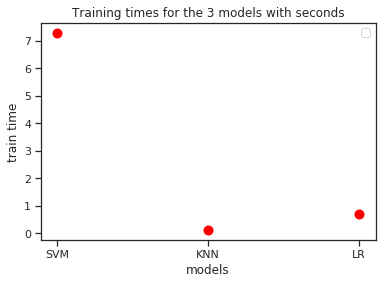

In [472]:
# KNN has the lowest training time, SVM is the slowest 
models=['SVM','KNN', 'LR']
train_time=[ 7.273, 0.124,0.708 ]

plt.title('Training time for the 3 models with seconds')
plt.xlabel('models')
plt.ylabel('train time')
plt.scatter(models,train_time,c='red', linewidths=4)
plt.legend()
plt.show()

### 2. Test Time

No handles with labels found to put in legend.


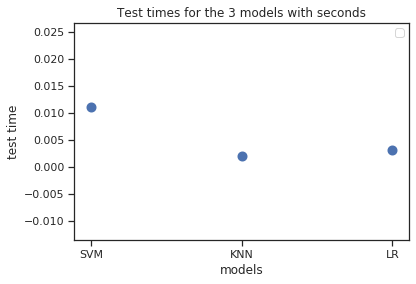

In [476]:
# while KNN has the lowest testing time, SVM is the slowest
models=['SVM','KNN', 'LR']
test_time=[ 0.011, 0.002 ,0.003 ]

plt.title('Test time for the 3 models with seconds')
plt.xlabel('models')
plt.ylabel('test time')
plt.scatter(models,test_time,c='b', linewidths=4)
plt.legend()
plt.show()

### 3. Accuracy

No handles with labels found to put in legend.


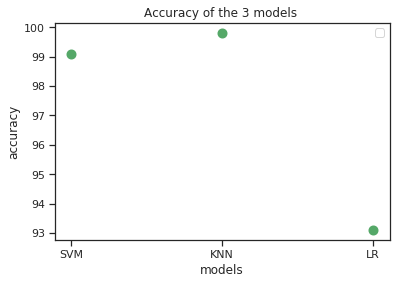

In [487]:
# the Accuracy of KNN is highest 
models=['SVM','KNN', 'LR']
accuracy=[ 99.1, 99.8 ,93.1 ]

plt.title('Accuracy of the 3 models ')
plt.xlabel('models')
plt.ylabel('accuracy')
plt.scatter(models,accuracy,c='g', linewidths=4)
plt.legend()
plt.show()

#  Resampling

In [ ]:
# dataset  is suffering from imbalance problem.
#It consists of removing samples from the majority class (under-sampling) and / or 
#adding more examples from the minority class (over-sampling).

In [61]:
count_1, count_2,count_3, count_4,count_5, count_6,count_7 = svm_target.value_counts()


In [87]:
count_2

6748

In [72]:
df_class_1 = data_frame_train[data_frame_train['Class'] == 1]
df_class_2 = data_frame_train[data_frame_train['Class'] == 2]

In [75]:
#df_class_2 

,0,1,2,3,4,5,6,7,8,Class
0,50,21,77,0,28,0,27,48,22,2
247,70,57,82,0,-42,-4,12,126,114,2
2007,42,36,77,0,-22,0,36,101,64,2
4146,69,59,82,0,-42,-5,13,126,112,2
4615,68,67,82,0,-42,-6,13,126,112,2
8455,41,33,77,0,-22,0,37,101,64,2
8914,50,22,79,0,42,0,29,37,8,2
9273,62,66,82,0,-42,-8,20,126,106,2
10571,72,21,82,0,-42,-1,10,126,116,2
12999,51,21,79,0,42,0,28,37,10,2


In [77]:
df_class_1_under = df_class_1.sample(count_2)
df_test_under = pd.concat([df_class_1_under, df_class_2], axis=0)

In [89]:
#df_class_1

In [88]:
#df_class_1_under

In [98]:
#over sampling:

df_class_2_over = df_class_2.sample(count_1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_2_over], axis=0)

In [99]:
#df_class_2_over
df_test_over

,0,1,2,3,4,5,6,7,8,Class
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1
7,55,-1,95,-3,54,-4,40,41,2,1
9,37,0,101,-7,28,0,64,73,8,1
...,...,...,...,...,...,...,...,...,...,...
28765,43,29,77,0,28,0,34,48,14,2
18079,50,23,79,0,42,0,29,37,8,2
10571,72,21,82,0,-42,-1,10,126,116,2
29080,41,21,77,0,28,0,36,48,12,2
